In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

h = 0.1
n = 100
n = 200
# n = 10000
# n = 100000

n = 1000 h = 0.1 y(x) = x(x+1)
Time taken by Forward Euler method: 0.0
Time taken by Backward Euler method: 0.0
Average percentage error of Forward Euler method: 2.7351910047624335
Average percentage error of Backward Euler method: 3.375667670826644


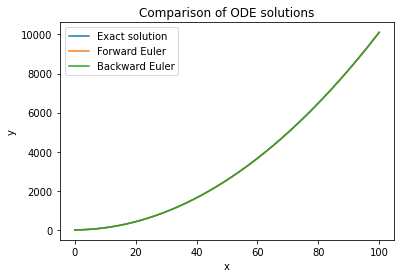

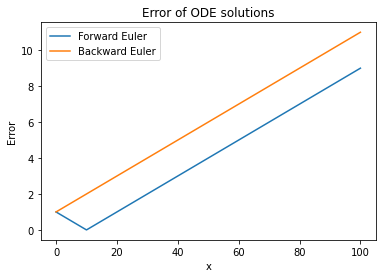

In [209]:
# First-order ODE
# Define the exact solution
def exact_solution(x):
    return x*(x+1)

# Define the derivative function
def deriv_func(x, y):
    return 2*x+1

# Define the Forward Euler method
def forward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0]
    for i in range(n):
        y = y + h*deriv_func(x, y)
        x = x + h
        y_list.append(y)
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Define the Backward Euler method
def backward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0]
    for i in range(n):
        y_next = y + h*deriv_func(x, y)
        y = y + h*deriv_func(x+h, y_next)
        x = x + h
        y_list.append(y)
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = 1

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Forward Euler solution and time
y_forward, t_forward = forward_euler(deriv_func, x0, y0, h, n)

# Calculate the Backward Euler solution and time
y_backward, t_backward = backward_euler(deriv_func, x0, y0, h, n)

# Calculate the tolerance values
tol_forward = np.abs(y_forward - y_exact)
tol_backward = np.abs(y_backward - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_forward, label='Forward Euler')
plt.plot(x, y_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_forward, label='Forward Euler')
plt.plot(x, tol_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = x(x+1)')
print('Time taken by Forward Euler method:', t_forward)
print('Time taken by Backward Euler method:', t_backward)

APE_forward = np.mean(np.abs(tol_forward/y_exact)[1:])*100
APE_backward = np.mean(np.abs(tol_backward/y_exact)[1:])*100

# Print the results
print('Average percentage error of Forward Euler method:', APE_forward)
print('Average percentage error of Backward Euler method:', APE_backward)

n = 1000 h = 0.1 y(x) = 1/2 (3 sin(x) - x cos(x))
Time taken by Forward Euler method: 3.0007362365722656
Time taken by Backward Euler method: 5.504608154296875
Average percentage error of Forward Euler method: 1970.5363200736056
Average percentage error of Backward Euler method: 102.65232482870019


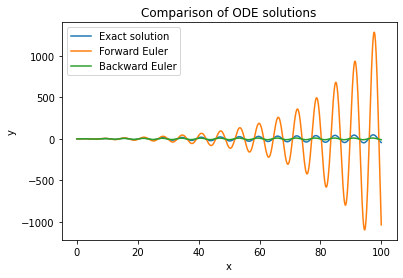

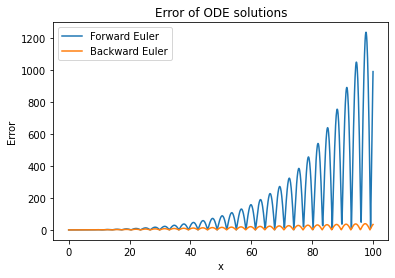

In [210]:
# Second-order ODE

# Define the exact solution
def exact_solution(x):
    return 0.5*(3*np.sin(x) - x*np.cos(x))

# Define the derivative function
def deriv_func(x, y):
    return np.array([y[1], np.sin(x) - y[0]])

# Define the Forward Euler method
def forward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y[0]]
    for i in range(n):
        y = y + h*deriv_func(x, y)
        x = x + h
        y_list.append(y[0])
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Define the Backward Euler method
def backward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y[0]]
    for i in range(n):
        y_next = y + h*deriv_func(x, y)
        y = y + h*deriv_func(x+h, y_next)
        x = x + h
        y_list.append(y[0])
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([0, 1])
# h = 0.1
# n = 10000

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Forward Euler solution and time
y_forward, t_forward = forward_euler(deriv_func, x0, y0, h, n)

# Calculate the Backward Euler solution and time
y_backward, t_backward = backward_euler(deriv_func, x0, y0, h, n)

# Calculate the tolerance values
tol_forward = np.abs(y_forward - y_exact)
tol_backward = np.abs(y_backward - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_forward, label='Forward Euler')
plt.plot(x, y_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_forward, label='Forward Euler')
plt.plot(x, tol_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = 1/2 (3 sin(x) - x cos(x))')
print('Time taken by Forward Euler method:', t_forward)
print('Time taken by Backward Euler method:', t_backward)

APE_forward = np.mean(np.abs(tol_forward/y_exact)[1:])*100
APE_backward = np.mean(np.abs(tol_backward/y_exact)[1:])*100

# Print the results
print('Average percentage error of Forward Euler method:', APE_forward)
print('Average percentage error of Backward Euler method:', APE_backward)

n = 100000 h = 0.1 y(x) = 2x + 2exp(-x) + 2cos(x) - 3
Time taken by Forward Euler method: 300.6620407104492
Time taken by Backward Euler method: 574.653148651123
Average percentage error of Forward Euler method: 1.492062959313867e+211
Average percentage error of Backward Euler method: 0.048390087563529645


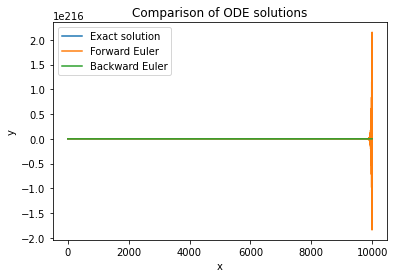

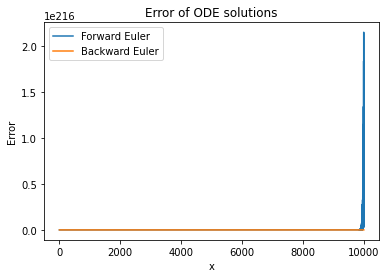

In [55]:
# Third-order ODE

import numpy as np
import matplotlib.pyplot as plt
import time

# Define the exact solution
def exact_solution(x):
    return 2*x + 2*np.exp(-x) + 2*np.cos(x) - 3

# Define the derivative function
def third_order_ODE(x, y):
    return np.array([y[1], y[2], 2*x - 1 - y[0] - y[1] - y[2]])

# Define the Forward Euler method
def forward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y[0]]
    for i in range(n):
        y = y + h*deriv_func(x, y)
        x = x + h
        y_list.append(y[0])
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Define the Backward Euler method
def backward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y[0]]
    for i in range(n):
        y_next = y + h*deriv_func(x+h, y+h*deriv_func(x, y))
        y = y_next
        x = x + h
        y_list.append(y[0])
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([1, 0, 0])

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Forward Euler solution and time
y_forward, t_forward = forward_euler(third_order_ODE, x0, y0, h, n)

# Calculate the Backward Euler solution and time
y_backward, t_backward = backward_euler(third_order_ODE, x0, y0, h, n)

# Calculate the tolerance values
tol_forward = np.abs(y_forward - y_exact)
tol_backward = np.abs(y_backward - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_forward, label='Forward Euler')
plt.plot(x, y_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_forward, label='Forward Euler')
plt.plot(x, tol_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = 2x + 2exp(-x) + 2cos(x) - 3')
print('Time taken by Forward Euler method:', t_forward)
print('Time taken by Backward Euler method:', t_backward)

APE_forward = np.mean(np.abs(tol_forward/y_exact)[1:])*100
APE_backward = np.mean(np.abs(tol_backward/y_exact)[1:])*100

# Print the results
print('Average percentage error of Forward Euler method:', APE_forward)
print('Average percentage error of Backward Euler method:', APE_backward)

n = 200 h = 0.1 y(x) = ((x - 1) sin(sqrt(2) x))/sqrt(2) + (x + 1) cos(sqrt(2) x)
Time taken by Forward Euler method: 1.0323524475097656
Time taken by Backward Euler method: 0.99945068359375
Average percentage error of Forward Euler method: 575.4218440712492
Average percentage error of Backward Euler method: 133.99927298763683


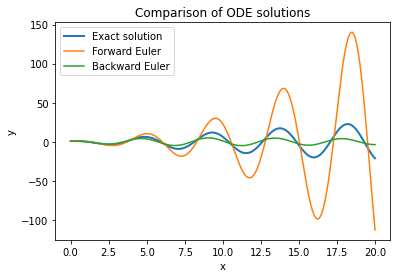

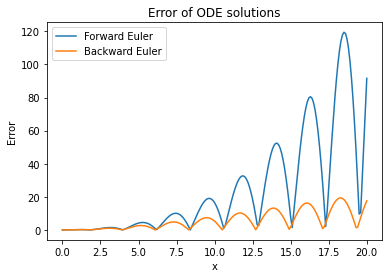

In [4]:

# Fourth-order ODE
# Define the exact solution
def exact_solution(x):
    return ((x-1)*np.sin(np.sqrt(2)*x))/np.sqrt(2) + (x+1)*np.cos(np.sqrt(2)*x)

# Define the derivative function
def deriv_func(x, y):
    return np.array([y[1], y[2], y[3], -4*y[2] - 4*y[0]])

# Define the Forward Euler method
def forward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0]
    for i in range(n):
        y = y + h*deriv_func(x, y)
        x = x + h
        y_list.append(y)
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Define the Backward Euler method
def backward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0]
    for i in range(n):
        y_next = y + h*deriv_func(x, y)
        y = y + h*deriv_func(x+h, y_next)
        x = x + h
        y_list.append(y)
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([1, 0, 0, -4])
# h = 0.05
# n = 100000

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Forward Euler solution and time
y_forward, t_forward = forward_euler(deriv_func, x0, y0, h, n)

# Calculate the Backward Euler solution and time
y_backward, t_backward = backward_euler(deriv_func, x0, y0, h, n)

# Calculate the tolerance values
tol_forward = np.abs(y_forward[:,0] - y_exact)
tol_backward = np.abs(y_backward[:,0] - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution', linewidth=2)
plt.plot(x, y_forward[:,0], label='Forward Euler')
plt.plot(x, y_backward[:,0], label='Backward Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_forward, label='Forward Euler')
plt.plot(x, tol_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = ((x - 1) sin(sqrt(2) x))/sqrt(2) + (x + 1) cos(sqrt(2) x)')

print('Time taken by Forward Euler method:', t_forward)
print('Time taken by Backward Euler method:', t_backward)

# Calculate the relative error (as a percentage) and average over the domain
# average percentage error (APE) APE = 1/n * ∑(|(y_numerical - y_exact)/y_exact|) * 100%
APE_forward = np.mean(np.abs(tol_forward/y_exact)[1:])*100
APE_backward = np.mean(np.abs(tol_backward/y_exact)[1:])*100

# Print the results
print('Average percentage error of Forward Euler method:', APE_forward)
print('Average percentage error of Backward Euler method:', APE_backward)